In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_excel('valmisteltu51.xlsx')
df.drop(['Unnamed: 0'], axis=1).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Education_text,JobInvolvement_text,PerformanceRating_text,RelationshipSatisfaction_text,WorkLifeBalance_text,DailyRateClass,Distance Class,Age Class,Overall Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,5,College,High,Excellent,Low,Bad,"(1000.0, 1250.0]","(0.0, 5.0]","(40, 50]",3.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,Below College,Medium,Outstanding,Very high,Better,"(250.0, 500.0]","(5.0, 10.0]","(40, 50]",2.5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,College,Medium,Excellent,Medium,Better,"(1250.0, 1500.0]","(0.0, 5.0]","(30, 40]",3.5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,Master,High,Excellent,High,Better,"(1250.0, 1500.0]","(0.0, 5.0]","(30, 40]",3.5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,Below College,High,Excellent,Very high,Better,"(500.0, 750.0]","(0.0, 5.0]","(20, 30]",1.5


In [4]:
Education = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

In [5]:
df1 = pd.crosstab(df['Education'], 'lkm')

df1.columns.name= ''

df1.index = Education

n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

df1.loc['Total'] = df1.sum()

df1.style.format({'%': '{:.1f} %'})

,lkm,%
Below College,170,11.6 %
College,282,19.2 %
Bachelor,572,38.9 %
Master,398,27.1 %
Doctor,48,3.3 %
Total,1470,100.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '45 %')]

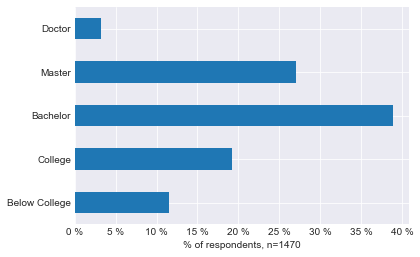

In [6]:
ax1 = df1.drop('Total')['%'].plot.barh()

ax1.set_xlabel('% of respondents, n=' +str(n))

ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

In [7]:
import seaborn as sns

[Text(0, 0, 'Low'),
 Text(0, 0, 'Medium'),
 Text(0, 0, 'High'),
 Text(0, 0, 'Very high')]

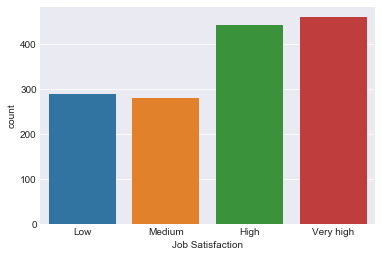

In [8]:
ax2 = sns.countplot(x=df['JobSatisfaction'])

ax2.set_xlabel('Job Satisfaction')

jobsatisfaction = ['Low', 'Medium', 'High', 'Very high']

ax2.set_xticklabels(jobsatisfaction)

In [9]:
##etäisyysluokka määritelty aiemmin dataan

df1 = pd.crosstab(df['Distance Class'], 'count')

df1.columns.name = ''

n = df1['count'].sum()
df1['%'] = df1/n*100

df1.index = df1.index.astype(str)
df1.loc['Total'] = df1.sum()

df1.reindex(['(0.0, 5.0]', '(5.0, 10.0]', '(10.0, 15.0]', '(15.0, 20.0]', 
             '(20.0, 25.0]', 'Total'])

df1.style.format({'%': '{:.1f} %'})


,count,%
Distance Class,,
"(0.0, 5.0]",632,45.7 %
"(10.0, 15.0]",115,8.3 %
"(15.0, 20.0]",125,9.0 %
"(20.0, 25.0]",117,8.5 %
"(5.0, 10.0]",394,28.5 %
Total,1383,100.0 %


In [10]:
bins = 5

df['Satisfaction Class'] = pd.cut(df['Overall Satisfaction'], bins = bins)

df1 = pd.crosstab(df['Satisfaction Class'], 'count')

df1.columns.name = ''

n = df1['count'].sum()
df1['%'] = df1/n*100

df1.index = df1.index.astype(str)
df1.loc['Total'] = df1.sum()

df1.style.format({'%': '{:.2f} %'})

,count,%
Satisfaction Class,,
"(0.997, 1.6]",155,10.54 %
"(1.6, 2.2]",253,17.21 %
"(2.2, 2.8]",342,23.27 %
"(2.8, 3.4]",304,20.68 %
"(3.4, 4.0]",416,28.30 %
Total,1470,100.00 %


In [11]:
import numpy as np

[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %')]

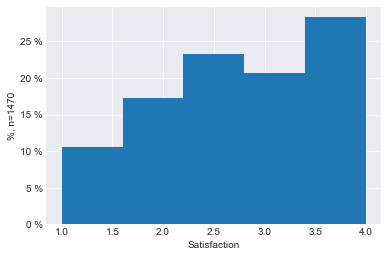

In [12]:
ax1 = df['Overall Satisfaction'].hist(bins=bins, weights=np.ones(n)/n)
ax1.set_xlabel('Satisfaction')
ax1.set_ylabel('%, n='+str(n))

ax1.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax1.get_yticks()])

In [13]:
df.describe().style.format('{:.2f}')

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Overall Satisfaction
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,734.50,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12,2.73
std,424.50,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57,0.77
min,0.00,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
25%,367.25,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,2.00
50%,734.50,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00,2.50
75%,1101.75,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00,3.50
max,1469.00,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00,4.00


In [14]:
df1 = df[['Age', 'YearsAtCompany', 'MonthlyIncome']].describe()

df1.index = ['Count', 'Mean', 'Standard Deviation', 'Minimum', 'Lower Quartile',
            'Median', 'Upper Quartile', 'Maximum']
df1.style.format('{:.2f}')

,Age,YearsAtCompany,MonthlyIncome
Count,1470.00,1470.00,1470.00
Mean,36.92,7.01,6502.93
Standard Deviation,9.14,6.13,4707.96
Minimum,18.00,0.00,1009.00
Lower Quartile,30.00,3.00,2911.00
Median,36.00,5.00,4919.00
Upper Quartile,43.00,9.00,8379.00
Maximum,60.00,40.00,19999.00


In [15]:
df2 = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean().to_frame('Average')
df2

df2.style.format('{:.3f}')

,Average
JobSatisfaction,2.729
EnvironmentSatisfaction,2.722
RelationshipSatisfaction,2.712


Text(0.5, 0, 'Average Satisfaction')

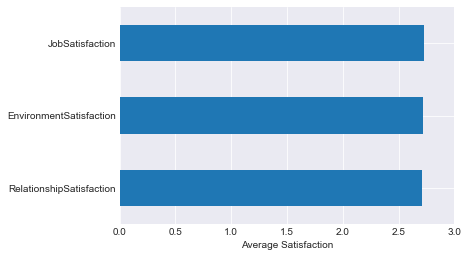

In [16]:
ax1 = df2.sort_values('Average').plot.barh(legend=False)
ax1.set_xlim(0,3)
ax1.set_xlabel('Average Satisfaction')

[Text(0, 0, 'JobSatisfaction'),
 Text(0, 0, 'EnvironmentSatisfaction'),
 Text(0, 0, 'RelationshipSatisfaction')]

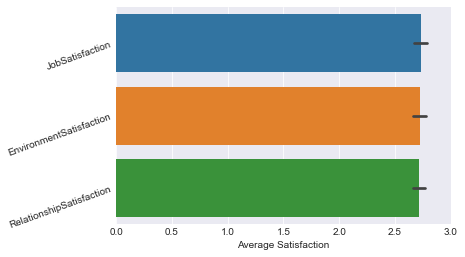

In [22]:
ax2 = sns.barplot(data=df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']], orient='h')
ax2.set_xlim(0,3)
ax2.set_xlabel('Average Satisfaction')
ax2.set_yticklabels(ax2.get_yticklabels(),rotation=20)

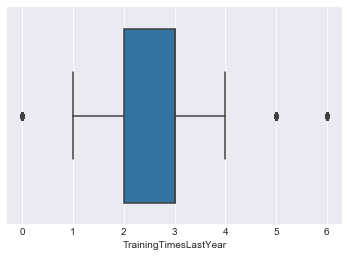

In [18]:
sns.boxplot(df['TrainingTimesLastYear'])

[Text(0, 0, 'JobSatisfaction'),
 Text(0, 0, 'EnvironmentSatisfaction'),
 Text(0, 0, 'RelationshipSatisfaction'),
 Text(0, 0, 'JobInvolvement')]

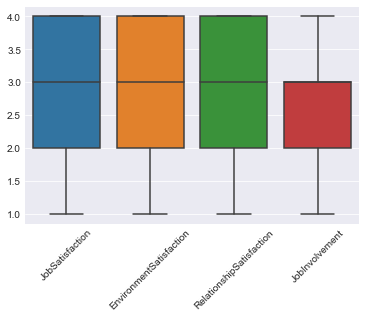

In [19]:
ax3 = sns.boxplot(data=df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement']])
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)